# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import statsmodels.api as sm

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

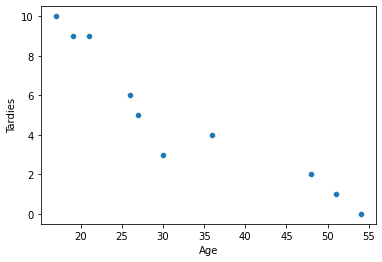

In [4]:
sns.scatterplot(data=student_data, x='Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

##### Les 2 séries sont corrélées négativement.
##### Sans la calculer, on peut voir que la courbe a une pente de -0.2.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
corr = student_data.Tardies.corr(student_data.Age)
print('Corrélation:', corr)
cov = student_data.Tardies.cov(student_data.Age)
print('Covariance:', cov)

Corrélation: -0.9391626886887121
Covariance: -45.56666666666666


In [6]:
# La corrélation est comprise entre -1 et +1.
# La covariance est une corrélation non normalisée.
# Si on normalise la corrélation, on retrouve la valeur de la covariance.

c = corr * (student_data['Tardies'].std() * student_data['Age'].std())
c

# La corrélation étant comprise entre -1 et 1, la covariance est 
# comprise entre -std(X) * std(Y) et +std(X) * std(Y).

-45.56666666666666

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# C'est une régression linéraire.
X = sm.add_constant(student_data['Age'])
lr = sm.OLS(student_data['Tardies'], X)
res = lr.fit()
res.summary()

C:\Users\mailb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 13 May 2021   Prob (F-statistic):           5.57e-05
Time:                        16:21:04   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

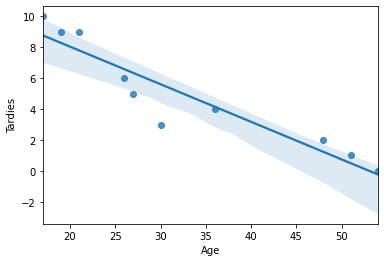

In [8]:
# Your code here.
sns.regplot(data=student_data, x='Age', y='Tardies')

# On retrouve sous 'coef' la pente qu'on a constatée précédemment de façon visuelle, environ -0.2.
# R² = 0.882, ce qui signifie que l'âge explique ("prédit") à 88% les retards.
# Donc le modèle de régression linéaire est globalement très pertinent.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('../../../_LabData/vehicles/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Commençons en standardisant nos séries de données afin de pouvoir mieux les comparer entre elles.
vehicles = (vehicles - vehicles.mean(axis=0)) / vehicles.std(axis=0)

In [11]:
# Your response here.
vcorr = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vcorr.columns = ['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
vcorr.corr()

# In the correlation table we can see that CO2 emissions p. mile are strongly corrolated to 
# Fuel Barrels/Year and Fuel Cost/year, as the correlation scores are close to 1,
# and are also strongly corrolated to Combined MPG as the score is close to -1.
# There is also a lesser but strong corrolation with Cylinders.
# There is no real corrolation with Year.

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.
# Nous allons faire une régression linéaire dont le but est d'expliquer les émissions de CO2 par mile
# à partir des variables explicatives 'Year', 'Cylinders', 'Fuel Barrels/Year','Fuel Cost/Year' et 'Combined MPG'.
# On utilise le modèle classique de régression linéaire.

Print your regression summary, and interpret the results. What are the most important variables in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
# Your code here.
X = sm.add_constant(vehicles[['Year','Cylinders', 'Fuel Barrels/Year','Fuel Cost/Year','Combined MPG']])
lr = sm.OLS(vehicles['CO2 Emission Grams/Mile'], X)
res = lr.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                             16:21:07   Log-Likelihood:                 20112.
No. Observations:                    35952   AIC:                        -4.021e+04
Df Residuals:                        35946   BIC:                        -4.016e+04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.387e-13      0.001   8.76e-10      1.000      -0.001       0.001
Year                 -0.0272      0.001    -33.060      0.000      -0.029      -0.026
Cylinders             0.0277      0.001     22.598      0.000       0.025       0.030
Fuel Barrels/Year     0.7149      0.002    311.600      0.000       0.710       0.719
Fuel Cost/Year        0.1376      0.002     67.025      0.000       0.134       0.142
Combined MPG         -0.1306      0.002    -71.645      0.000      -0.134      -0.127
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                         7.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Au vu du R², on constate que Le modèle explique les émissions de CO2 à 98%.
# Le modèle est donc très pertinent.

In [ ]:
sns.pairplot(vehicles, x_vars=['Year','Cylinders', 'Fuel Barrels/Year','Fuel Cost/Year','Combined MPG'], y_vars=["CO2 Emission Grams/Mile"],
height=5, aspect=.8, kind="reg");

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
df = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attendees': [1,2,4,4,5,7,8,13]})
df['Absent'] = df.Invited - df.Attendees
print(df)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.
sns.regplot(data=df, x='Invited', y='Absent')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your comments below:
# On constate une relation d'ordre linéaire entre les 2 séries de données (nbe d'invités et nbe d'absents.)

In [ ]:
# Your response here.
X = sm.add_constant(df.Invited)
lr = sm.OLS(df.Absent, X)
res = lr.fit()
res.summary()

In [ ]:
# Above we can see that the slope (under 'coef/Invited') is 0.1515.
# Under 'coef/const' we can see that the intercept is 0.4394.
# Finally we can see that the determination coefficient R-squared is 0.3030.

In [ ]:
# Other method:

from scipy import stats
X = df.Invited
Y = df.Absent
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The determination coefficient R² is: ' + str(r_value**2))

In [ ]:
# Your response here. 
# Le nombre d'invités explique le nombre d'absents à 30%.
# La relation peut être considérée comme linéaire, et la droite qui la représente géométriquement a une 
# pente de 0,15. Son équation est y = 0,15x + 0,44. Ainsi, pour 100 invités, les absents seront au nombre
# de 15. On a bien un absentéisme presque proportionnel au nombre d'invités, de l'ordre de 15%.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# La dernière valeur du jeu de données semble aberrante. On la supprime.
df2 = pd.DataFrame({'Invited': [1,3,4,6,8,9,11], 'Attendees': [1,2,4,4,5,7,8]})
df2['Absent'] = df2.Invited - df2.Attendees
print(df2)

In [ ]:
# Your code here.
sns.regplot(data=df2, x='Invited', y='Absent')

In [ ]:
# Your response here. 
X = sm.add_constant(df2['Invited'])
lr = sm.OLS(df2['Absent'], X)
res = lr.fit()
res.summary()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# Après suppression de la valeur aberrante, les 2 séries sont encore plus fortement corrélées. 
# Le nombre d'invités explique davanage l'absentéisme, à 78% au lieu de 30%.
# La relation peut être considérée comme linéaire, et la pente de la droite qui représente géométriquement 
# cette relation a changé, elle est plus élevée, ce qui signifie que l'absentéisme croït plus vite que 
# précédemment.
# L'équation de la droite de régression est y = 0,32x + 0,32.
# Ainsi, pour 100 invités, les absents seront au nombre de 32.